In [5]:
import sys
import os
import time
import random
import json
from datetime import timezone, datetime
import string
import uuid
from uuid import UUID
import pandas as pd
import seaborn as sns

In [6]:
def random_generator(size=6, chars=string.ascii_uppercase):
    return ''.join(random.choice(chars) for x in range(size))


import elasticsearch
es = elasticsearch.Elasticsearch()

read_readings={}

In [9]:
total_docs=0
j=0
itr=0
MAX_ITR=10
startf = datetime.now();

while itr<MAX_ITR: 
    start = datetime.now();
    for index in range(100000000000):
        
        try:
            
            vmid1="vm"+random_generator(2,'1234')
            
         
            res = es.search(index="elastic_perf",body={"from":0,"size":1000,"query": {"match": {"vmid":vmid1}}})
            #print("%d documents found" % res['hits']['total'])
            timec=int((datetime.now() - start).total_seconds())

            if timec==1:
                j=j+1
                itr=itr+1
                read_readings[j]=index
                total_docs=total_docs + index
                break
                   
        except:
            print ('Unexpected error:', sys.exc_info()[0], ', for index ', index)
            raise
            
print ('Read',total_docs, ' in ', (datetime.now() - startf).total_seconds(), 's')
print ('average read per second is :',total_docs/10)

Read 1094  in  10.049815 s
average read per second is : 109.4


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8585375b00>],
      dtype=object)

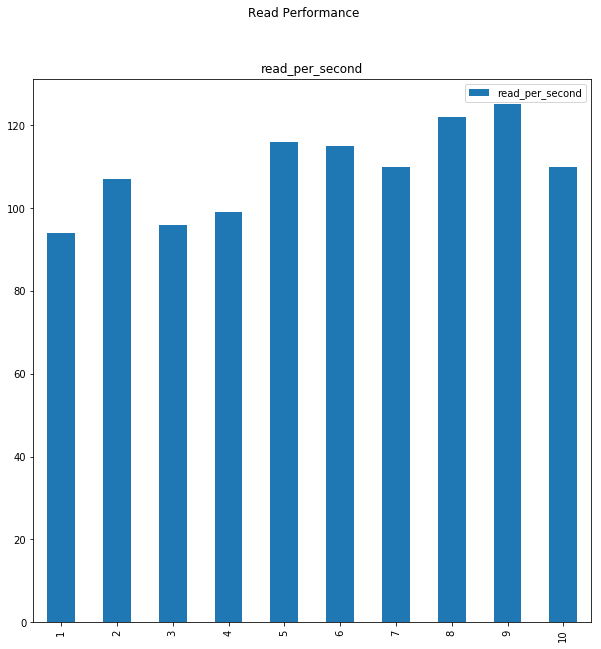

In [10]:
producer_df = pd.DataFrame.from_dict(read_readings, orient='index').rename(columns={0: 'read_per_second'})
producer_df.sort_index(inplace=True)
producer_df
producer_df.plot(kind='bar', subplots=True, figsize=(10, 10), title="Read Performance")